## AVIATION ANALYSIS PROJECT

Assessing Aircraft Accident Trends and Safety Risks

## Project Overview

This project analyzes aircraft accident data (1962-2023) to identify trends, risk factors, and insights into aviation safety. Using Python (pandas, NumPy, Matplotlib) and Tableau, we aim to:

🛠️Clean and preprocess aviation accident data.

🔍Explore trends in accident frequency, causes, and severity.

📊Visualize key insights through charts and interactive dashboards.

📉Identify risk factors that contribute to aviation incidents.

### Dataset Information

'AviationData.csv' – Contains accident reports, aircraft details, causes, and locations.

'USState_Codes.csv'– Mapping of state codes to full state names for analysis.


❓ Key Questions

What are the most common causes of aviation accidents?

How have accident trends changed over time?

Which aircraft types and flight phases have the highest risk?

What role does weather or location play in accidents?

Let’s dive into the data!

# Data Loading

Data Loading: Importing the Dataset for Analysis
The first step in any data analysis process is loading the dataset into the environment. This allows us to inspect, clean, and prepare the data for further exploration.

1. Importing Necessary Libraries
Before loading the datasets provided, essential Python libraries are imported for data manipulation and analysis.

2. Reading the Dataset
The datasets that are provided will then be loaded using Pandas.

3. Inspecting the Data
After loading, initial checks shall then be performed to understand the dataset structure

4. Verifying Data Integrity
To ensure data integrity, the following are checked for:

Duplicate values – using .duplicated().sum()

Inconsistent column names – using aviation_df.columns

Missing values – using .isnull().sum()

In [11]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
# Loading the datasets as DataFrames

Data = pd.read_csv("AviationData.csv", encoding = "latin1", low_memory = False)
#Data.head()

In [13]:
Data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [15]:
Data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [16]:
Data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [17]:
Data.shape

(88889, 31)

In [18]:
Data.duplicated().sum()

0

In [19]:
Data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Data Cleaning

In [20]:
# Checking for missing values in the dataset
missing_values_num = Data.isnull().sum()

# Displaying only columns with missing values
missing_values_num = missing_values_num[missing_values_num > 0]

# Checking percentage of missing values
missing_percentage = (missing_values_num / len(Data)) * 100

# Display missing values with percentage
missing_data = pd.DataFrame({'Missing Values': missing_values_num, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
Location,52,0.058500
Country,226,0.254250
Latitude,54507,61.320298
Longitude,54516,61.330423
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324
Injury.Severity,1000,1.124999
Aircraft.damage,3194,3.593246
Aircraft.Category,56602,63.677170
Registration.Number,1317,1.481623


## Dropping Columns or Rows

If a column has too many missing values (e.g., above 50-60%), we may drop it.

If only a few rows are missing values in critical columns, we can drop them.


In [21]:
Data = Data.dropna(thresh=len(Data) * 0.4, axis=1)
Data = Data.dropna(subset=['Make', 'Model', 'Amateur.Built'])

## The code below helps fill mising value

##### For numerical columns, we can fill missing values with mean, median, or mode.
##### For categorical columns, we can fill with mode (most common value) or 'Unknown'.

In [22]:
Data['Total.Fatal.Injuries'] = Data['Total.Fatal.Injuries'].fillna(np.ceil(Data['Total.Fatal.Injuries'].mean()))
Data['Total.Serious.Injuries'] = Data['Total.Serious.Injuries'].fillna(np.ceil(Data['Total.Serious.Injuries'].mean()))
Data['Total.Minor.Injuries'] = Data['Total.Minor.Injuries'].fillna(np.ceil(Data['Total.Minor.Injuries'].mean()))
Data['Total.Uninjured'] = Data['Total.Uninjured'].fillna(round(Data['Total.Uninjured'].mean()))
Data['Number.of.Engines'] = Data['Number.of.Engines'].fillna(Data['Number.of.Engines'].median())

In [23]:
# Selecting only categorical columns
categorical_cols = Data.select_dtypes(include=['object'])

# Checking for missing values
missing_values_cat = categorical_cols.isnull().sum()

# Displaying only columns with missing values
missing_values_cat = missing_values_cat[missing_values_cat > 0]

# Checking percentage of missing values
missing_percentage_cat = (missing_values_cat / len(Data)) * 100

# Display missing values with percentage
missing_data_cat = pd.DataFrame({'Missing Values': missing_values_cat, 'Percentage': missing_percentage_cat})
missing_data_cat

,Missing Values,Percentage
Location,48,0.054128
Country,225,0.253727
Airport.Code,38474,43.386184
Airport.Name,35942,40.530910
Injury.Severity,979,1.103994
Aircraft.damage,3154,3.556688
Registration.Number,1208,1.362232
Engine.Type,6928,7.812535
Purpose.of.flight,6073,6.848373
Weather.Condition,4381,4.940346


# Approach

## Categorize missing values into three levels:

### Low Missing Percentage (≤ 5%)

#### Filled using Mode (most frequent value in the column).
Ensures minimal data distortion.
Moderate Missing Percentage (5% - 20%)

#### Replaced with "Unknown" or "Not Available".
Helps preserve data integrity when missing values may hold meaning.
High Missing Percentage (> 20%)

Uses Forward Fill (ffill) first, filling missing values with the previous row's value.
If values are values are still missing, applies Backward Fill (bfill) to fill using the next row’s value.

In [24]:
total_rows = len(Data)

for col in missing_values_cat.index:
    missing_percentage_cat = (missing_values_cat[col] / total_rows) * 100  # Calculate missing percentage
    
    if missing_percentage_cat <= 5:  # If missing values are 5% or less
        Data[col] = Data[col].fillna(Data[col].mode()[0])
    
    elif 5 < missing_percentage_cat <= 20:  # If missing values are between 5% and 20%
        Data[col] = Data[col].fillna("Unknown")
    
    else:  # If missing values are more than 20%
        Data[col] = Data[col].fillna(method='ffill')  # First, try forward fill
        Data[col] = Data[col].fillna(method='bfill')  # Then, try backward fill if still missing

# Confirm missing values are handled
print("Missing values after handling:\n", Data.isnull().sum())

Missing values after handling:
 Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


 ## Now that the data is filled with no none or null values we can proceed with coverting the data in the Event_Date column to the correct format.

In [25]:
# Convert Event_Date to datetime format
Data['Event.Date'] = pd.to_datetime(Data['Event.Date'])

## Extracting Time-Based Features

Since accidents often have seasonal trends, let’s create features from the date column:

In [26]:
# Extracting key time-related features
Data['Year'] = Data['Event.Date'].dt.year
Data['Month'] = Data['Event.Date'].dt.month
Data['Day_Of_Week'] = Data['Event.Date'].dt.day_name()

### The above will:

#### Help to analyze if accidents occur more frequently on weekends.
#### Detect the seasonal trends (e.g., winter vs. summer accidents).

### Counting Incidents

##### To better understand aviation accident trends, create new features that count the number of incidents based on different categories.

In [27]:
Data['Manufacturer.Incident.Count'] = Data.groupby('Make')['Make'].transform('count') # Count incidents per aircraft manufacturer (Make)
Data['Model.Incident.Count'] = Data.groupby('Model')['Model'].transform('count') # Count incidents per aircraft model
Data['Flight.Purpose.Incident_Count'] = Data.groupby('Purpose.of.flight')['Purpose.of.flight'].transform('count') # Count incidents per flight purpose
Data['Weather.Incident.Count'] = Data.groupby('Weather.Condition')['Weather.Condition'].transform('count') # Count incidents per weather condition

## groupby('Make') groups the dataset by Make:

Counts how many times each manufacturer appears in the dataset (i.e., how many accidents involve aircraft from that manufacturer).
Assigns the count as a new column manufacturer_incident_count for each row.

## groupby('Model') groups the dataset by Model:

Counts how many accidents occurred for each model.
Stores the count in model_incident_count.

## groupby('Purpose_Of_Flight') groups accidents based on the Purpose_Of_Flight:

Counts how many accidents occurred for each type of flight.
Creates flight_purpose_incident_count to store the count.

## groupby('Weather_Condition') groups accidents by Weather_Condition:

Counts how many accidents happened under each weather type.
Stores this in weather_incident_count to help analyze how weather impacts aviation safety.

### By counting the number of incidents based on different categories, we are able to:

Identify high-risk aircraft manufacturers and models.
Detect which types of flights have more accidents.
Analyze weather conditions associated with aviation incidents.
Improve accident prediction models by adding meaningful features.

### Identify Key Features
Categorize the features into potentially useful and less useful based on their relevance to accident analysis.

The potentially useful features are to be kept and the less useful features are to be dropped.

Potentially useful features to be kept:

 Event.Date: Helps analyze accident trends over time.

 Airport.Name: Identifying high-risk airports.

 Contry and Location: Geographical distribution of the accidents.

 Injury.Severity: The severity of accidents.

 Aircraft.damage: Understanding the extent of damage.

 Make and Model: Aircraft manufacturers & models with the most accidents.

 Number.of.Engines and Engine_Type: Engine configuration influence on accidents.

 Purpose.of.flight: Comparing accidents between commercial & private flights.

 Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured: Evaluate the accident impact.

 Weather.Condition: Role of weather in accidents.

 Broad.phase.of.flight: Identifies when accidents occur (e.g., takeoff, landing).

 Year,Month,Day.Of.Week, Manufacturer.Incident.Count, Model.Incident.Count, Flight.Purpose.Incident.Count & Weather.Incident.Count: New features for deeper insights.

## Less useful features to be dropped:

 Airport.Code: May not be necessary if we have Airport_Name.

 Registration.Number: Unique to each aircraft, not relevant for trend analysis.

 Accident.Number: Identifier that doesn’t add analytical value.

 Report.Status&Publication.Date: Administrative data, not directly useful for insights.

In [28]:
# Dropping irrelevant columns
columns_to_drop = ['Accident.Number', 'Registration.Number', 'Airport.Code', 'Report.Status', 'Publication.Date']
Data = Data.drop(columns=columns_to_drop)

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88678 entries, 0 to 88888
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Event.Id                       88678 non-null  object        
 1   Investigation.Type             88678 non-null  object        
 2   Event.Date                     88678 non-null  datetime64[ns]
 3   Location                       88678 non-null  object        
 4   Country                        88678 non-null  object        
 5   Airport.Name                   88678 non-null  object        
 6   Injury.Severity                88678 non-null  object        
 7   Aircraft.damage                88678 non-null  object        
 8   Make                           88678 non-null  object        
 9   Model                          88678 non-null  object        
 10  Amateur.Built                  88678 non-null  object        
 11  Number.of.Engin

In [30]:
# Transforming the cleaned data to a csv file
Data.to_csv('Aviation_Data_Cleaned.csv', index=False)

# Data Visualization.

Aviation safety is a critical aspect of the airline industry, with accidents providing key insights into potential risk factors and areas of improvement. By analyzing historical accident data, we can identify trends, high-risk scenarios, and potential preventive measures. This report presents a series of visualizations that explore patterns in aviation accidents based on aircraft manufacturers, flight phases, and more.

The goal is to uncover meaningful relationships that can help enhance aviation safety, inform industry stakeholders, and provide a data-driven approach to understanding accident dynamics.

# Data Overview

The dataset used in this analysis includes aviation accident records spanning multiple decades. The key features analyzed in this report include:

Event Date – To analyze accident trends over time.

Aircraft Make & Model – To assess which manufacturers and models report higher accident occurrences.

Phase of Flight – To determine when accidents are most likely to happen (e.g., takeoff, landing, cruise).

Number of Engines & Engine Type – To analyze the relationship between aircraft configuration and accident rates.

Injury Severity & Damage Extent – To examine the impact of accidents on passengers and aircraft.

Purpose of Flight – To compare accident trends in commercial and private aviation.

By analyzing these features, we aim to highlight key insights that could contribute to risk mitigation and improved aviation policies.

### Visualizations and Insights

# 1. Accident Trends Over Time

Understanding how aviation accident rates fluctuate over the years can help identify improvements in safety measures and detect patterns in accident occurrences. A line chart visualizing accident counts per year highlights long-term trends and whether aviation safety has improved over time.

#### Key Insights:

Are accident rates declining due to technological advancements and improved regulations?

Do we see spikes in specific years, possibly linked to policy changes or global events?

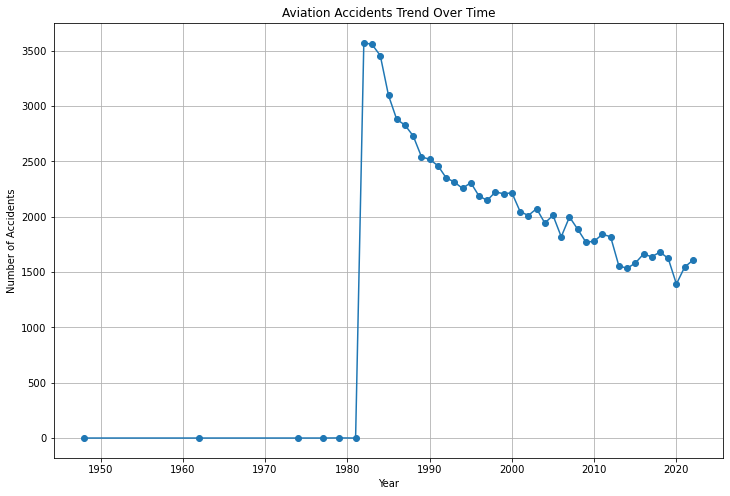

In [31]:
# Accient Trends over Time
plt.figure(figsize=(12, 8))
Data.groupby('Year').size().plot(marker='o')
plt.title('Aviation Accidents Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# 2. Aircraft Damage Types

Different accidents result in varying degrees of aircraft damage. This visualization categorizes incidents based on minor damage, substantial damage, and total loss.

### Key Insights:

What percentage of accidents result in a total aircraft loss?

Are minor damage incidents more common than catastrophic accidents?

Can certain aircraft types withstand impact better than others?

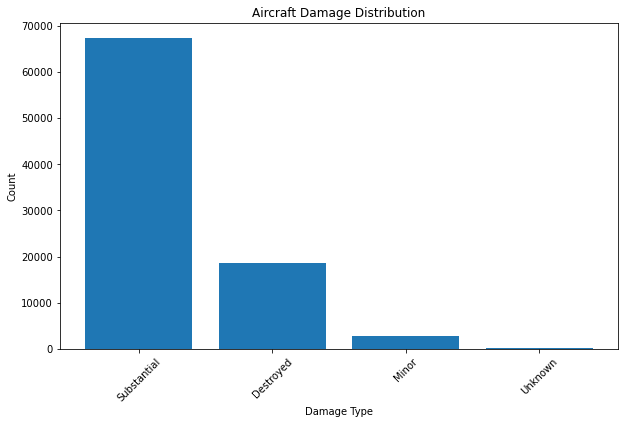

In [32]:
# Aircraft damage types
# Get counts and sorted order
damage_counts = Data['Aircraft.damage'].value_counts()
categories = damage_counts.index

# Create figure
plt.figure(figsize=(10, 6))
plt.bar(categories, damage_counts)

# Add labels and title
plt.title('Aircraft Damage Distribution')
plt.xlabel('Damage Type')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

# 3. Accidents by Phase of Flight

Not all phases of flight carry the same level of risk. By analyzing which phase—takeoff, climb, cruise, descent, or landing—has the highest accident occurrences, we can pinpoint critical moments that require extra precaution.

### Key Insights:

Do most accidents occur during takeoff and landing, the most complex phases of flight?

Are mid-flight accidents less common, or do certain conditions make them more frequent?

How can airlines improve safety procedures in high-risk phases?

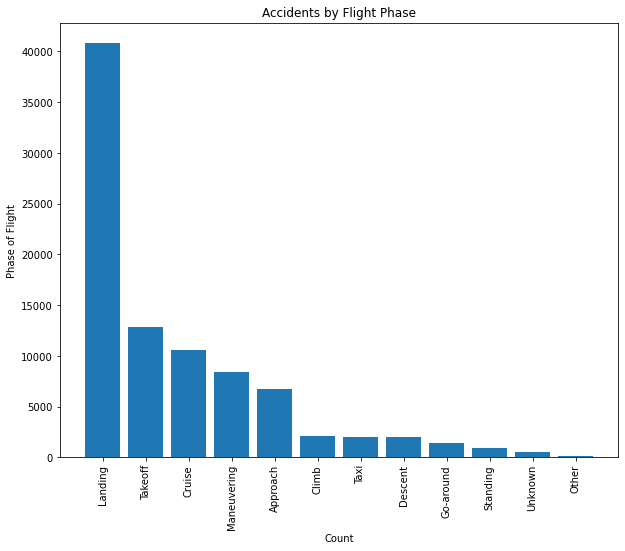

In [33]:
# Get counts and sorted order
flight_phase_counts = Data['Broad.phase.of.flight'].value_counts()
categories = flight_phase_counts.index

# Create figure
plt.figure(figsize=(10, 8))
plt.bar(categories, flight_phase_counts)

# Add labels and title
plt.title('Accidents by Flight Phase')
plt.xlabel('Count')
plt.ylabel('Phase of Flight')

# Rotate x-axis labels
plt.xticks(rotation=90)
# Show plot
plt.show()

# 4. Top Manufacturers Involved in Accidents

Some aircraft manufacturers produce a higher volume of planes, naturally leading to more incidents. This visualization compares accident frequencies among major aircraft manufacturers.

### Key Insights:

Do certain manufacturers have disproportionately high accident rates?

Does accident frequency correlate with production volume or design flaws?

How do different manufacturers compare in terms of safety records?

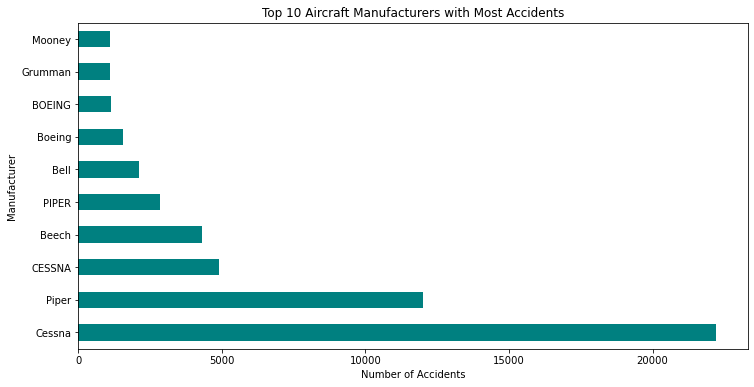

In [34]:
# Top manufacturers involved in accidents
plt.figure(figsize=(12, 6))
Data['Make'].value_counts().nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Aircraft Manufacturers with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Manufacturer')
plt.show()

# 5. Number of Engines vs. Accidents

This analysis explores whether aircraft with more engines experience fewer or more accidents. We compare single-engine, twin-engine, and multi-engine aircraft.

### Key Insights:

Do single-engine aircraft have higher accident rates due to mechanical failure risks?

Are multi-engine aircraft safer, or do complex systems introduce more failure points?

How does engine count influence accident survival rates?

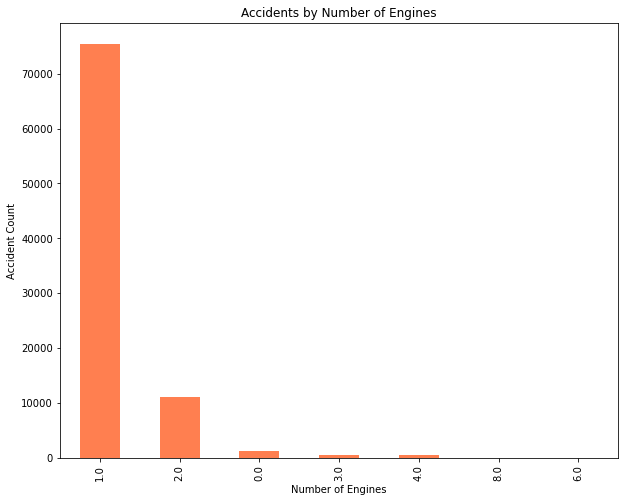

In [35]:
# Number of engines vs. accidents
plt.figure(figsize=(10, 8))
Data['Number.of.Engines'].value_counts().plot(kind='bar', color='coral')
plt.title('Accidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Accident Count')
plt.show()

# 6. Manufacturer vs. Number of Engines

Different aircraft manufacturers design planes with varying engine configurations. A box plot of manufacturers and engine counts provides insights into their aircraft designs.

### Key Insights:

Do some manufacturers favor single-engine designs, while others focus on multi-engine planes?

How do engine configurations impact accident trends for different manufacturers?

Are manufacturers producing a diverse range of aircraft, or specializing in specific types?

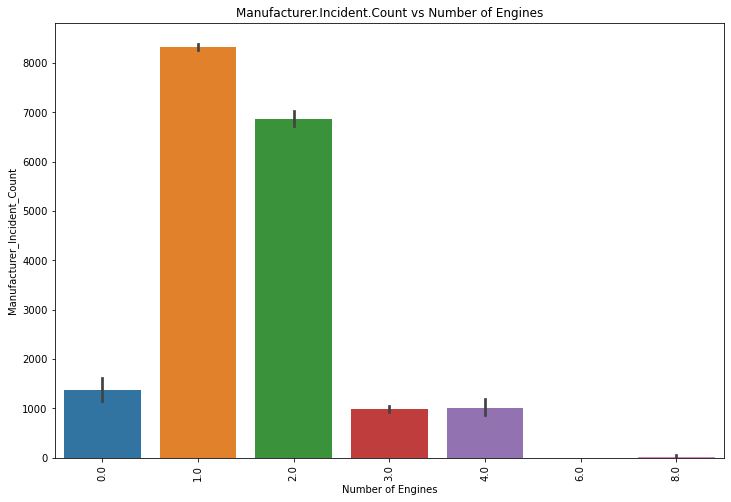

In [36]:
# Manufacturer vs Number of Engines
plt.figure(figsize=(12, 8))
sns.barplot(x=Data['Number.of.Engines'], y=Data['Manufacturer.Incident.Count'])
plt.xticks(rotation=90)
plt.title('Manufacturer.Incident.Count vs Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Manufacturer_Incident_Count')
plt.show()

# 7. Purpose of Flight vs. Injury Severity

Different flight purposes, such as commercial, private, cargo, and military, may have varying levels of accident severity. This visualization examines the average number of injuries for each flight purpose to understand how risk levels differ across categories.

### Key Insights:

Do certain flight purposes experience higher fatal or serious injuries?

Are private flights more prone to severe injuries compared to commercial flights?

Which flight categories tend to have the highest number of uninjured passengers?

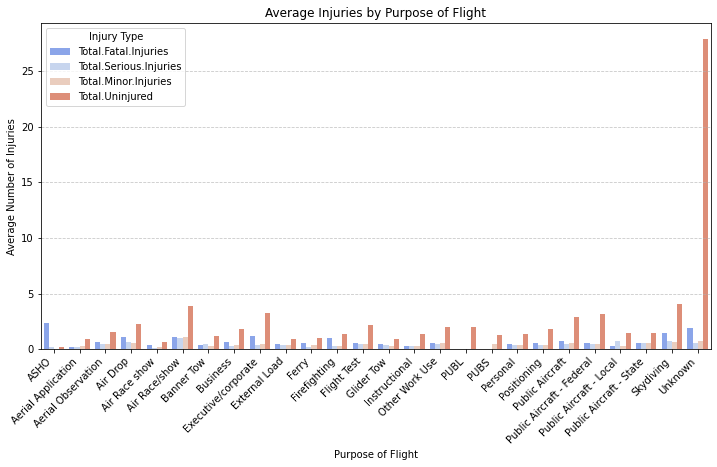

In [37]:
# Define the injury types
injury_types = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Group by Purpose of Flight and compute mean injuries
purpose_injuries = Data.groupby('Purpose.of.flight')[injury_types].mean().reset_index()

# Melt the dataframe for easier plotting
purpose_injuries_melted = purpose_injuries.melt(id_vars=['Purpose.of.flight'], 
                                                 var_name='Injury.Type', 
                                                 value_name='Average.Injuries')

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot grouped bar chart
sns.barplot(
    data=purpose_injuries_melted, 
    x='Purpose.of.flight', 
    y='Average.Injuries', 
    hue='Injury.Type', 
    palette='coolwarm'
)

# Customize plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.xlabel("Purpose of Flight")
plt.ylabel("Average Number of Injuries")
plt.title("Average Injuries by Purpose of Flight")
plt.legend(title="Injury Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 8. Manufacturer vs. Purpose of Flight

Different aircraft are built for different purposes, such as commercial transport, private aviation, cargo, and military use. This visualization compares manufacturers based on the primary purpose of their aircraft.

### Key Insights:

Are some manufacturers more dominant in commercial aviation, while others focus on private or military aircraft?

Does the purpose of flight influence accident frequency (e.g., are private flights riskier than commercial ones)?

How do cargo flights compare to passenger flights in terms of safety?

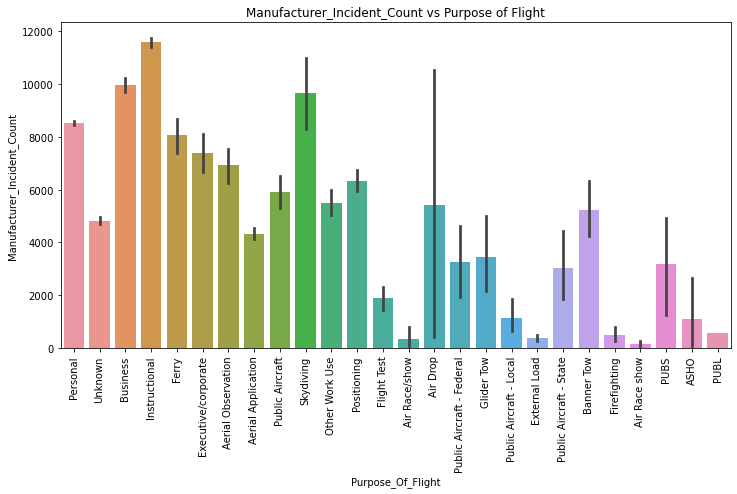

In [38]:
# Manufacturer vs Purpose of Flight
plt.figure(figsize=(12, 6))
sns.barplot(x=Data['Purpose.of.flight'], y=Data['Manufacturer.Incident.Count'])
plt.xticks(rotation=90)
plt.title('Manufacturer_Incident_Count vs Purpose of Flight')
plt.xlabel('Purpose_Of_Flight')
plt.ylabel('Manufacturer_Incident_Count')
plt.show()

# 9. Correlation Heatmap of Injury Severity and Number of Engines

Understanding the relationship between injury severity and aircraft characteristics can provide insights into accident outcomes. This heatmap visualizes the correlation between different injury severity levels and the number of engines in aviation accidents.

### Key Insights:

Are aircraft with more engines associated with higher or lower injury severity?

Do fatal, serious, minor, and uninjured cases show strong correlations with each other?

How does the number of engines relate to injury severity patterns in aviation accidents?

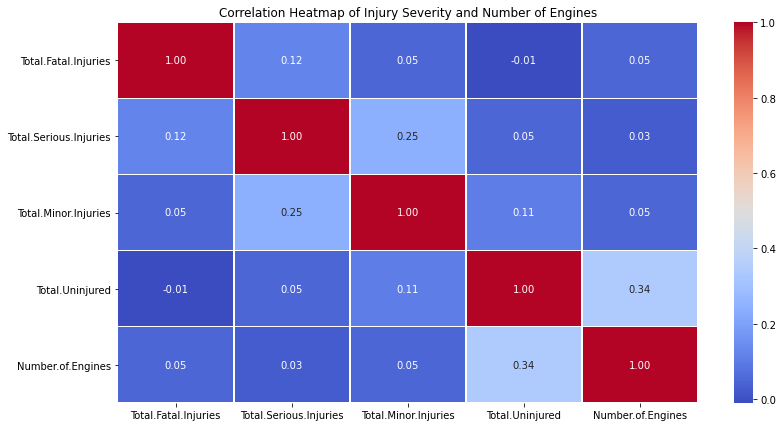

In [39]:
# Select numerical columns for correlation
num_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']

# Compute correlation matrix
correlation_matrix = Data[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(13, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Injury Severity and Number of Engines")
plt.show()

# Conclusion

These visualizations offer valuable insights into aviation accident trends, helping to identify high-risk scenarios, critical safety concerns, and potential preventive measures. By leveraging data analytics, aviation regulators, manufacturers, and airlines can work towards enhancing flight safety, reducing accident risks, and improving overall industry standards.

Further analysis could explore additional factors such as pilot experience, maintenance history, and specific accident causes to gain a more comprehensive understanding of aviation safety.